##이진 분류 문제 simoid 자연상수 activation 을 쓰는 이유 


In [2]:
#import 
import numpy as np 
import matplotlib.pyplot as plt 


In [7]:
#data_load 
x = np.arange(0,10) # xdata 생성 

#자연상수 를 x를 지수를 하여 저장 
exp_rows = []
for i in x:
  exp_rows.append(np.exp(i))


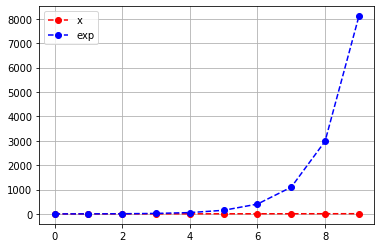

'\n자연상수를 적용했을때 값에 변화가 민감해 진다\n'

In [9]:
#시각화 
plt.plot(x,'r--o',label = 'x')
plt.plot(exp_rows,'b--o',label ='exp')
plt.grid()
plt.legend()
plt.show()
'''
자연상수를 적용했을때 값에 변화가 민감해 진다
'''

In [10]:
#확률로 sigmoid 비교 
def exp(x):
  return np.round(np.exp(x),3)



In [11]:
A_real = exp(0.5) #매개변수가 예측한 값 = 0.5는 임계치 이상 = 양수
A_fake = exp(0) #0으로 예측하면 예측 실패 = 거짓 

print(A_real)
print(A_fake)

1.649
1.0


In [13]:
#비례 상수 구하기  1 / 전체 경우의 수치 를 비례식 으로 나타냄 
'''
k * Areal = 해당 경우의 수치/전체 경우의 수치
'''
k = 1 / (A_real + A_fake)
print(k * A_real)
print(k* A_fake)

0.6224990562476406
0.3775009437523594


In [15]:
#근데 만약 예측 값이 음수 이면 이것도 먹히나?
A_real = exp(-1)
A_fake = exp(0)

print(A_real)
print(A_fake)


0.368
1.0


In [17]:
#비례 상수 구하기 
k = 1 / (A_real + A_fake)

print(k * A_real)
print(k * A_fake)
#음수 값도 확률로나오고 합은 1이다 

0.26900584795321636
0.7309941520467836


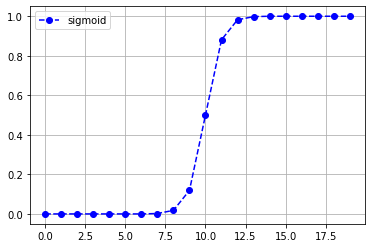

In [29]:
#sigmoid 
def sigmoid(x):
  return np.round(1/(1+np.exp(-x)),3)

sigmoid_list = []
i_list = []
for i in range(-20,20,2):
  i_list.append(i)
  sigmoid_list.append(sigmoid(i))
#plt.plot(i_list,'r--o',label = 'x')
plt.plot(sigmoid_list,'b--o',label ='sigmoid')
plt.grid()
plt.legend()
plt.show()

##crossentropy 실습 전구 작동의 경우의 수를 보고 전구의 수 구현 
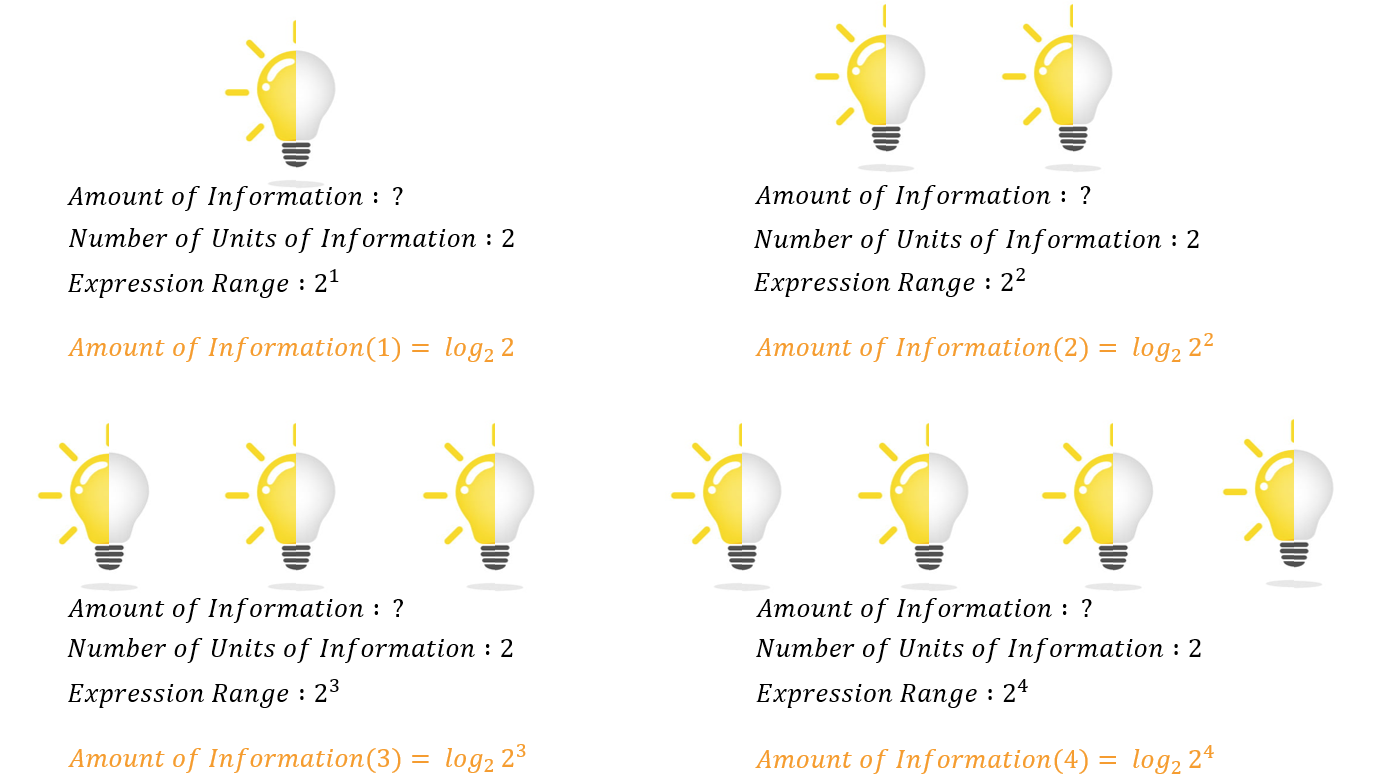

In [32]:
import numpy as np

def amount_of_info(number_of_units_infomation,expression_range):
  if number_of_units_infomation == 2:
    amount_of_infomation = np.log2(expression_range) #밑이 2인 로그를 적용하여 전구의 수를 구함
  else:
    print("Check The Param(number_of_units_information)")
  
  return np.round(amount_of_infomation,3)

amount_of_infomation = amount_of_info(2,64)

expression_range = [2,4,8,16,32]

for i in expression_range:
  amount_of_infomation = amount_of_info(2,i)
  print("Amount_of_information :",amount_of_infomation)


Amount_of_information : 1.0
Amount_of_information : 2.0
Amount_of_information : 3.0
Amount_of_information : 4.0
Amount_of_information : 5.0


##Information entropy(실제값)
해당 경우가 일어날 확률 prob 

infomation entropy =  -sum(pi * log(pi))
amount of information  = -log pi 

##cross entropy(예측값)
확실한 확률값 pi 가 아닌 예측 값 qi을 넣어서 계산한다 
비교 방법은 information entropy 와 crossentropy 를 비교하면서 최적화를 하는 방식이다
cross entropy = -sum(pi *log(qi))



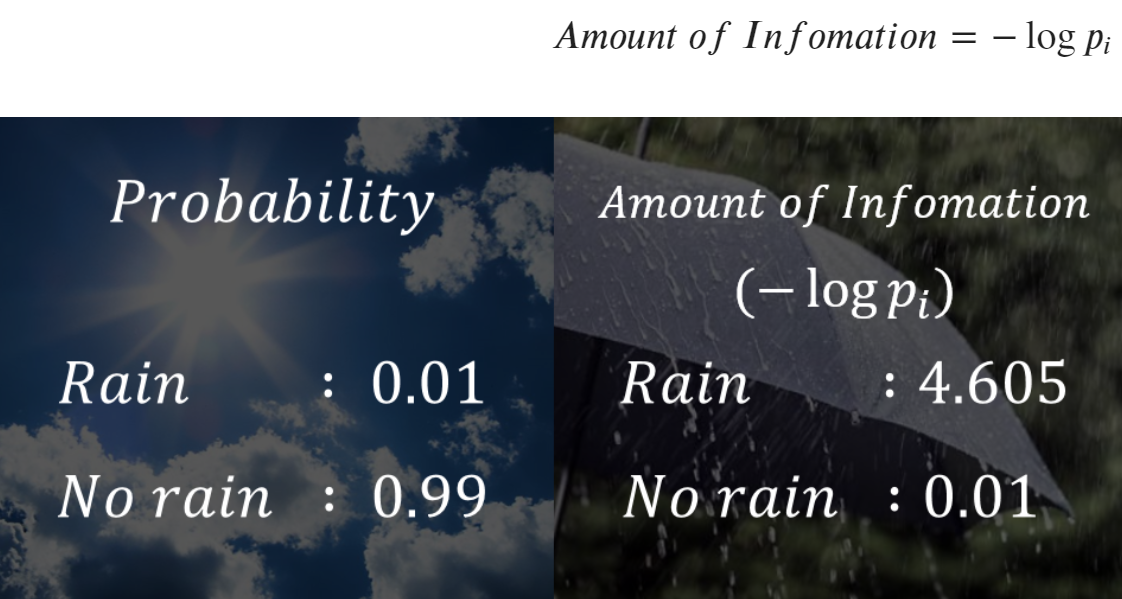

In [35]:
#amount of information 구하기 
def amount_of_information(prob):
  return np.round(-np.log(prob),3)

print(amount_of_information(0.01)) #비가 올 확률 
print(amount_of_information(0.99)) #비가 오지 않을 확률 

4.605
0.01


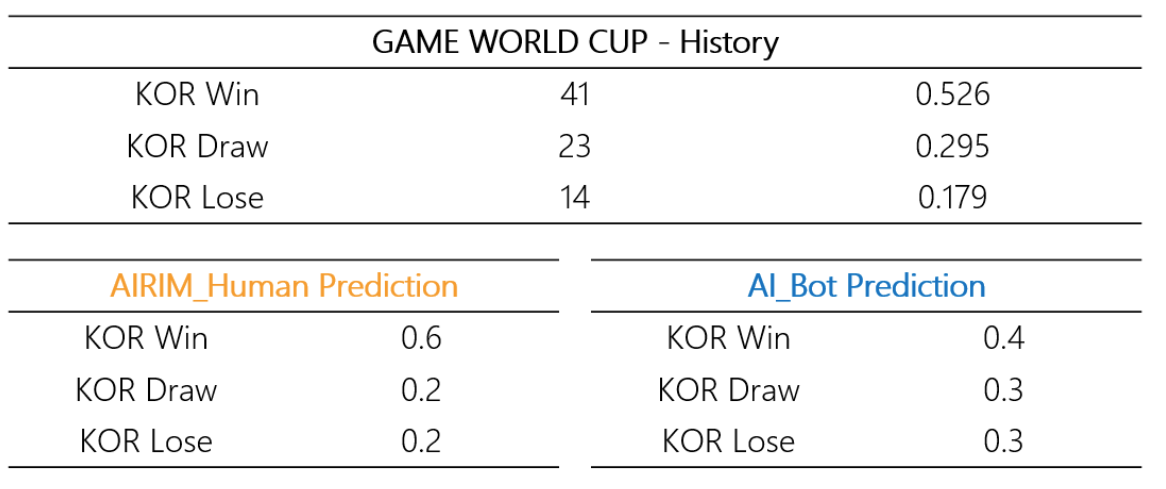

In [39]:
#cross entropy information entropy 계산 
real_prob  = np.array([0.526,0.295,0.179])
human_predict = np.array([0.6,0.2,0.2])
Ai_predict = np.array([0.4,0.3,0.3])

class Entropy():
  def __init__(self,prob,q):
    self.prob = prob
    self.q = q

  def entropy(self,switch = True): #True 면 information entropy 구하기 
    if switch ==True:
      return - np.sum(self.prob * np.log(self.prob))
    else:
      return - np.sum(self.prob * np.log(self.q))

In [40]:
EH = Entropy(real_prob,human_predict)
EA = Entropy(real_prob,Ai_predict)

print("Information_entropy:{}".format(EH.entropy(True)))
print("human_predict_cross_entropy:{}".format(EH.entropy(False)))
print("Information_entropy:{}".format(EA.entropy(True)))
print("AI_predict_cross_entropy:{}".format(EA.entropy(False)))

Information_entropy:1.0060070517163597
human_predict_cross_entropy:1.0315678485946747
Information_entropy:1.0060070517163597
AI_predict_cross_entropy:1.0526520342162993
